In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.special import ellipk, ellipkinc
from scipy.special import ellipk, ellipkinc, ellipj, ellipeinc


In [ ]:

B = 1.0      
l = 1.0      
pi_sq_over_4 = (B * np.pi**2) / (4 * l**2)  


P_cr = pi_sq_over_4  
initial_guesses = np.linspace(0, 2 * np.pi, 50)
s_values = np.linspace(0, l, 100)
def equilibrium_condition(theta_l, alpha, P_over_Pcr):
    lambda_sq = pi_sq_over_4 * P_over_Pcr  
    k = np.sin((theta_l + alpha - np.pi) / 2)
    
    if np.abs(k) > 1:
        return 1e6  
    term = (1 / k) * np.sin((alpha - np.pi) / 2)
    if np.abs(term) > 1:
        return 1e6  
    sigma0 = np.arcsin(term)
    

    K_k = ellipk(k**2)
    K_sigma0_k = ellipkinc(sigma0, k**2)
    
    lhs = (K_k - K_sigma0_k)**2
    P_normalized = P_over_Pcr * P_cr 
    return lhs - P_normalized
def compute_position_corrected(s_values, sigma0, k, lambda_val, l):
    x_values, y_values = [], []
    for s in s_values:
      
        u = s * lambda_val + ellipkinc(sigma0, k**2) 
        cn = ellipj(u, k**2)[1]  
        cn_k = ellipj(ellipkinc(sigma0, k**2), k**2)[1]  
        A1 = (cn - cn_k) * (-2 * k) / (lambda_val * l)
   
        am = ellipj(u, k**2)[3] 
        E_am = ellipeinc(am, k**2)  
        E_sigma0 = ellipeinc(sigma0, k**2) 
        A2 = -(s / l) + (2 / (lambda_val * l)) * (E_am - E_sigma0)
        
        x_values.append(A1)
        y_values.append(A2)
    return np.array(x_values), np.array(y_values)

C:\Users\Mohan Raj A\AppData\Local\Temp\ipykernel_10064\3420018088.py:25: RuntimeWarning: invalid value encountered in subtract
  lhs = (K_k - K_sigma0_k)**2
C:\Users\Mohan Raj A\AppData\Local\Temp\ipykernel_10064\3420018088.py:16: RuntimeWarning: divide by zero encountered in divide
  term = (1 / k) * np.sin((alpha - np.pi) / 2)
C:\Users\Mohan Raj A\AppData\Local\Temp\ipykernel_10064\3420018088.py:16: RuntimeWarning: invalid value encountered in multiply
  term = (1 / k) * np.sin((alpha - np.pi) / 2)
C:\Users\Mohan Raj A\AppData\Local\Temp\ipykernel_10064\2716607472.py:32: RuntimeWarning: divide by zero encountered in scalar divide
  term = (1 / k) * np.sin((alpha - np.pi) / 2)
C:\Users\Mohan Raj A\AppData\Local\Temp\ipykernel_10064\2716607472.py:32: RuntimeWarning: invalid value encountered in scalar multiply
  term = (1 / k) * np.sin((alpha - np.pi) / 2)


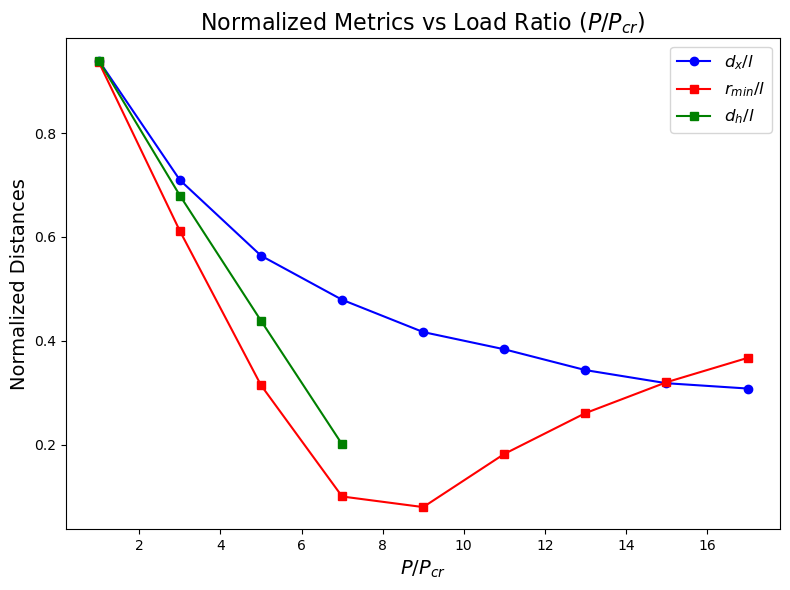

In [ ]:

P_Pcr_list = []
dy_over_l_list = []
rmin_over_l_list_0 = []
dx_over_l_list_0 = []
dh_over_l_list = []
psi_max_list=[]
P_over_Pcr_values=np.arange(1,9,2)
num_alpha = 25
alphas = np.linspace(0, np.pi, num_alpha)
P_over_Pcr_values = [1,3, 5, 7, 9, 11, 13, 15, 17]
alpha_end_points =np.array([1,1.34849, 1.57630, 1.70252, 1.77957, 1.83039, 1.86611, 1.89194, 1.91158]) 
for idx, (P_over_Pcr, alpha_end) in enumerate(zip(P_over_Pcr_values, alpha_end_points)):
    x_end_values = []
    y_end_values = []
    alphas = np.linspace(0, 2*np.pi-alpha_end*np.pi, num_alpha)
    for alpha in alphas:
        theta_solutions = []
        
        for guess in initial_guesses:
            theta_l_solution, info, ier, mesg = fsolve(equilibrium_condition, guess, args=(alpha, P_over_Pcr), full_output=True)
            if ier == 1:
                theta_l = theta_l_solution[-1]
                theta_solutions.append(theta_l)
        
        unique_solutions = list(set(np.round(theta_solutions, decimals=5)))
        
        
        for theta_l in unique_solutions:
            k = np.sin((theta_l + alpha - np.pi) / 2)
            term = (1 / k) * np.sin((alpha - np.pi) / 2)
            sigma0 = np.arcsin(np.clip(term, -1, 1))
            lambda_val = np.sqrt(P_over_Pcr * pi_sq_over_4 / B)
            x, y = compute_position_corrected(s_values, sigma0, k, lambda_val, l)
            psi_v=3*np.pi/2 - np.arctan2(y[-1],x[-1])
            if(psi_v)>2*np.pi:
                psi_v=-2*np.pi+psi_v
            x_end_values.append(-x[-1])
            y_end_values.append(y[-1])
    if x_end_values:
        dx = max(x_end_values) 
        dx_over_l = dx           
        dx_over_l_list_0.append(dx_over_l) 
    

    if y_end_values:
        dy = max(y_end_values)  
        dy_over_l = dy     
        dy_over_l_list.append(dy_over_l)
 
    if x_end_values and y_end_values:
        r_values = np.sqrt(np.array(x_end_values)**2 + np.array(y_end_values)**2)
        r_min = min(r_values) 
        rmin_over_l = r_min / l
        rmin_over_l_list_0.append(rmin_over_l)

    dh_found = False
    if x_end_values and y_end_values:
        for x_end, y_end in zip(x_end_values, y_end_values):
            if np.isclose(y_end, 0, atol=0.05): 
                dh = abs(x_end) 
                dh_over_l = dh / l
                dh_over_l_list.append(dh_over_l)
                dh_found = True
                break  
    if not dh_found:
        dh_over_l_list.append(np.nan)
    
    P_Pcr_list.append(P_over_Pcr)  


plt.figure(figsize=(8, 6))
plt.plot(P_Pcr_list, dx_over_l_list_0, marker='o', linestyle='-', color='b', label='$d_x / l$')
plt.plot(P_Pcr_list, rmin_over_l_list_0, marker='s', linestyle='-', color='r', label='$r_{min} / l$')
plt.plot(P_Pcr_list, dh_over_l_list, marker='s', linestyle='-', color='g', label='$d_h / l$')
plt.xlabel('$P / P_{cr}$', fontsize=14)
plt.ylabel('Normalized Distances', fontsize=14)
plt.title('Normalized Metrics vs Load Ratio ($P / P_{cr}$)', fontsize=16)
plt.legend(fontsize=12)
# plt.grid(True)
plt.tight_layout()
plt.savefig('Fig9a.pdf')
plt.show()


[3.14159564e+00 7.76949689e-01 3.80789981e-01 2.24273441e-01
 1.47052734e-01 1.02332567e-01 7.42226541e-02 5.57081851e-02
 3.04083150e-03]


C:\Users\Mohan Raj A\AppData\Local\Temp\ipykernel_10064\3420018088.py:16: RuntimeWarning: divide by zero encountered in divide
  term = (1 / k) * np.sin((alpha - np.pi) / 2)
C:\Users\Mohan Raj A\AppData\Local\Temp\ipykernel_10064\3420018088.py:16: RuntimeWarning: invalid value encountered in multiply
  term = (1 / k) * np.sin((alpha - np.pi) / 2)
C:\Users\Mohan Raj A\AppData\Local\Temp\ipykernel_10064\2860962454.py:51: RuntimeWarning: divide by zero encountered in scalar divide
  term = (1 / k) * np.sin((alpha - np.pi) / 2)
C:\Users\Mohan Raj A\AppData\Local\Temp\ipykernel_10064\2860962454.py:51: RuntimeWarning: invalid value encountered in scalar multiply
  term = (1 / k) * np.sin((alpha - np.pi) / 2)


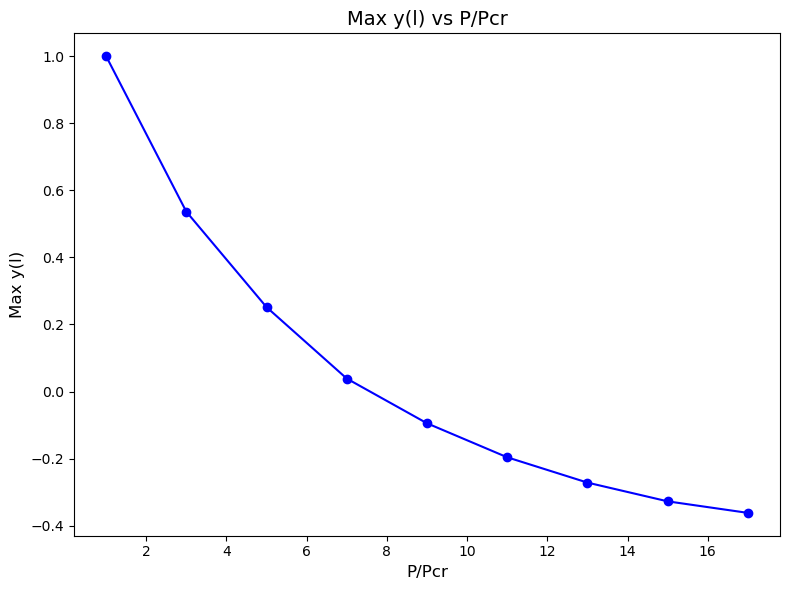

In [ ]:

P_over_Pcr_values = [1,3, 5, 7, 9, 11, 13, 15, 17]
alpha_div_pi_values = [1,1.34849, 1.57630, 1.70252,  5.58999/np.pi, 1.83039, 1.86611, 1.89194, 1.9]
alpha_s_values = np.array([1,1.34849, 1.57630, 1.70252, 1.77957, 1.83039, 1.86611, 1.89194, 1.91158]) * np.pi
alpha_div_pi_values=np.array(alpha_div_pi_values)
alpha_div_pi_values=np.round(alpha_div_pi_values,3)

y_l_values = []
x_l_values = []
unique_solutions=[]
Energy=[]
psi=[]
psi_max_val=[]
def compute_position_corrected(s_values, sigma0, k, lambda_val, l):
    x_values, y_values,A1_values = [], [],[]
    for s in s_values:
        u = s * lambda_val + ellipkinc(sigma0,k**2) 
        
        cn = ellipj(u, k**2)[1]  
        cn_k = ellipj(ellipkinc(sigma0,k**2), k**2)[1]  
        A1 = (cn - cn_k) * (-2 * k) / (lambda_val * l)
        
        
        am = ellipj(u, k**2)[3] 
        E_am = ellipeinc(am, k**2)  
        E_sigma0 = ellipeinc(sigma0, k**2)  
        A2 = -(s / l) + (2 / (lambda_val * l)) * (E_am - E_sigma0)
        
        x_values.append(A1)
        y_values.append(A2)
    return np.array(x_values), np.array(y_values)

for P_over_Pcr, alpha_div_pi in zip(P_over_Pcr_values, alpha_div_pi_values):
    alpha = alpha_div_pi * np.pi  
    theta_solutions = []
    for guess in initial_guesses:
        theta_l_solution, info, ier, mesg = fsolve(equilibrium_condition, guess, args=(alpha, P_over_Pcr), full_output=True)
        if ier == 1:
            theta_l = theta_l_solution[0]
            theta_solutions.append(theta_l)
    
    unique_solutions = list(set(np.round(theta_solutions, decimals=5)))
    max_y_l = -np.inf 
    max_x_l = -np.inf
    max_psi_l = -np.inf
    for theta_l in unique_solutions:
        k = np.sin((theta_l + alpha - np.pi) / 2)
        term = (1 / k) * np.sin((alpha - np.pi) / 2)
        sigma0 = np.arcsin(np.clip(term, -1, 1))
        lambda_val = np.sqrt(P_over_Pcr * pi_sq_over_4 / B)
        x, y = compute_position_corrected(s_values, sigma0, k, lambda_val, l)
        psi_v=(3*np.pi/2)-np.arctan2(y[-1],x[-1]) 
        m=-x[0]
        if(psi_v)>2*np.pi:
            psi_v=-2*np.pi+psi_v
        psi.append(psi_v)
        # Energy.append((2*x + np.cos(theta_l+alpha))*(np.pi**2/4)*P_over_Pcr)
        # print(P_over_Pcr,y[-1])
        max_y_l = max(max_y_l, y[-1]) 
        max_x_l = max(max_x_l, x[-1])
        max_psi_l=max(psi_v,max_psi_l)
    y_l_values.append(max_y_l)
    x_l_values.append(max_x_l)
    psi_max_val.append(max_psi_l)
y_l_values=np.array(y_l_values)
x_l_values=np.array(x_l_values)
psi_max_val_new=(3*np.pi/2)-np.arctan2(y_l_values,x_l_values)
psi_max_val_new=2*np.pi-psi_max_val_new
psi_max_val=np.array(psi_max_val)
psi_max_val=2*np.pi-psi_max_val
print(psi_max_val)   
    # Energy.append((2*max_x_l + np.cos(theta_l + alpha))*((np.pi**2)/4))
# Plot y(l) vs P/Pcr
plt.figure(figsize=(8, 6))
plt.plot(P_over_Pcr_values, y_l_values, marker='o', color='blue', label='Max y(l) vs P/Pcr')
# plt.plot(P_over_Pcr_values,alpha_s_values , color='red', label='Data Points', zorder=5)
# plt.plot(P_over_Pcr_values, psi_max_val_new, marker='o', color='blue', label='Max y(l) vs P/Pcr')
# plt.plot(P_over_Pcr_values, psi_max_val, marker='o', color='blue', label='Max y(l) vs P/Pcr')
plt.xlabel('P/Pcr', fontsize=12)
# plt.ylabel('$\\alpha$ (rad)', fontsize=14)
plt.ylabel('Max y(l)', fontsize=12)
plt.title('Max y(l) vs P/Pcr', fontsize=14)
# plt.title('Max $\\alpha_y$ and Max $\\alpha_r$ (rad) vs P/Pcr', fontsize=14)
# plt.grid(True)
# plt.legend(fontsize=10)
plt.tight_layout()
plt.savefig('Fig9b.pdf')
plt.show()


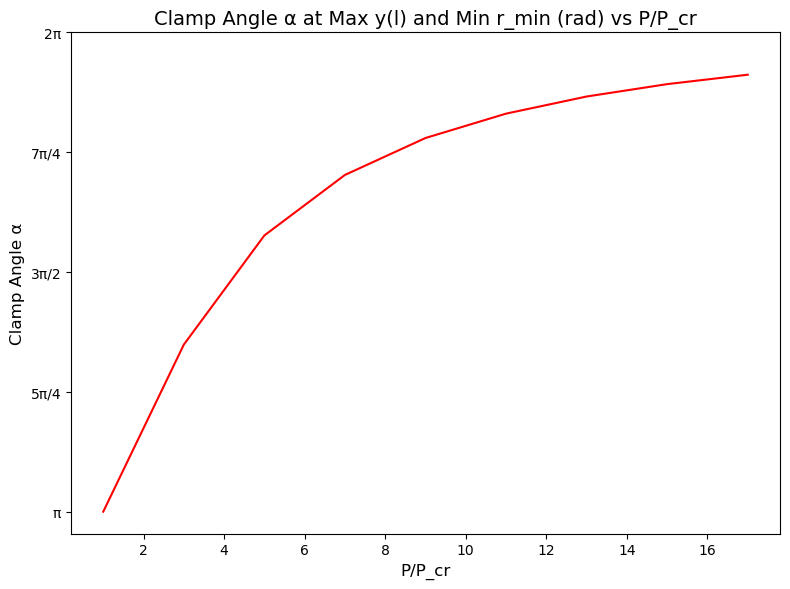

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Data

P_over_Pcr_values = [1,3, 5, 7, 9, 11, 13, 15, 17]

plt.figure(figsize=(8, 6))


plt.plot(P_over_Pcr_values,alpha_s_values, color='red', label='Data Points', zorder=5)


pi_ticks = [np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4, 2*np.pi]
pi_labels = ['π', '5π/4', '3π/2', '7π/4', '2π']
plt.yticks(pi_ticks, pi_labels)

# Labels and title
plt.ylabel('Clamp Angle α', fontsize=12)
plt.xlabel('P/P_cr', fontsize=12)
plt.title('Clamp Angle α at Max y(l) and Min r_min (rad) vs P/P_cr', fontsize=14)

plt.tight_layout()
plt.savefig('Fig9_alpha.pdf')

plt.show()
